# Copy post-processing files from original folder

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import shutil
import os

In [3]:
raw_base_dir='/global/cfs/cdirs/desi/users/font/lace_sims/'
pos_base_dir='/global/cfs/cdirs/desi/users/font/lace_post/'

In [4]:
def copy_file_if_needed(in_dir,out_dir,fname):
    in_fname = os.path.join(in_dir,fname)
    out_fname = os.path.join(out_dir,fname)
    if os.path.exists(out_fname):
        print('file {} already exists'.format(out_fname))
        return
    else:
        print('copy file {} to {}'.format(in_fname,out_fname))
        shutil.copyfile(in_fname,out_fname)
        return

In [5]:
def copy_dir_if_needed(in_dir,out_dir,dirname):
    in_dirname = os.path.join(in_dir,dirname)
    out_dirname = os.path.join(out_dir,dirname)
    
    if os.path.exists(out_dirname):
        if not os.path.isdir(out_dirname):
            raise ValueError(out_dirname+' exists but is not a folder!')
        print('folder {} already exists'.format(out_dirname))
        return
    else:
        print('copy folder {} to {}'.format(in_dirname,out_dirname))
        shutil.copytree(in_dirname,out_dirname)
        return

In [6]:
def mkdir_if_needed(dirname):
    if os.path.exists(dirname):
        print('folder {} already exists'.format(dirname))
        if not os.path.isdir(dirname):
            raise ValueError(dirname+' exists but is not a folder!')
    else:
        print('create directory',dirname)
        os.mkdir(dirname)

In [7]:
def assert_dir_exists(dirname):
    if not os.path.isdir(dirname):
        raise ValueError(dirname+' folder does not exist!')

In [8]:
def copy_post(sim_pair='sim_pair_0',no_parameter_file=False):

    raw_pair_dir = os.path.join(raw_base_dir,sim_pair)
    pos_pair_dir = os.path.join(pos_base_dir,sim_pair)
   
    assert_dir_exists(raw_pair_dir)
    mkdir_if_needed(pos_pair_dir)
    if not no_parameter_file:
        copy_file_if_needed(raw_pair_dir,pos_pair_dir,'parameter.json')
    
    for sim in ['sim_minus','sim_plus']:
        raw_dir = os.path.join(raw_pair_dir, sim)
        pos_dir = os.path.join(pos_pair_dir, sim)
        
        assert_dir_exists(raw_dir)
        mkdir_if_needed(pos_dir)
                  
        copy_dir_if_needed(raw_dir,pos_dir,'genpk')
        copy_dir_if_needed(raw_dir+'/output',pos_dir,'skewers')

        for fname in ['filtering_length.json','paramfile.gadget','paramfile.genic']:
            copy_file_if_needed(raw_dir,pos_dir,fname)

        for snap in range(11):
            p1d_fname='p1d_{}_Ns500_wM0.05.json'.format(snap)
            copy_file_if_needed(raw_dir,pos_dir,p1d_fname)

In [29]:
for sim_pair in ['Curved']:
    copy_post(sim_pair=sim_pair,no_parameter_file=True)

create directory /global/cfs/cdirs/desi/users/font/lace_post/Curved
create directory /global/cfs/cdirs/desi/users/font/lace_post/Curved/sim_minus
copy folder /global/cfs/cdirs/desi/users/font/lace_sims/Curved/sim_minus/genpk to /global/cfs/cdirs/desi/users/font/lace_post/Curved/sim_minus/genpk
copy folder /global/cfs/cdirs/desi/users/font/lace_sims/Curved/sim_minus/output/skewers to /global/cfs/cdirs/desi/users/font/lace_post/Curved/sim_minus/skewers
copy file /global/cfs/cdirs/desi/users/font/lace_sims/Curved/sim_minus/filtering_length.json to /global/cfs/cdirs/desi/users/font/lace_post/Curved/sim_minus/filtering_length.json
copy file /global/cfs/cdirs/desi/users/font/lace_sims/Curved/sim_minus/paramfile.gadget to /global/cfs/cdirs/desi/users/font/lace_post/Curved/sim_minus/paramfile.gadget
copy file /global/cfs/cdirs/desi/users/font/lace_sims/Curved/sim_minus/paramfile.genic to /global/cfs/cdirs/desi/users/font/lace_post/Curved/sim_minus/paramfile.genic
copy file /global/cfs/cdirs/de

In [30]:
a=1

In [22]:
import json
fname_new='/global/cfs/cdirs/desi/users/font/test_lace/lace_post/sim_pair_0/sim_minus/p1d_8_Ns500_wM0.05.json'
fname_old='/global/cfs/cdirs/desi/users/font/lace_post/sim_pair_0/sim_minus/p1d_8_Ns500_wM0.05.json'
with open(fname_new) as json_data:
    data_new = json.load(json_data)
with open(fname_old) as json_data:
    data_old = json.load(json_data)

In [23]:
snap_new=data_new['snapshot_data']
snap_old=data_old['snapshot_data']

for key in snap_new:
    if key not in snap_old:
        print(key,'not in data_old')
        continue
    value_new=snap_new[key]
    value_old=snap_old[key]
    if value_new != value_old:
        print(key,value_old,value_new)

skewers_dir /home/dc-pede1/rds/rds-dirac-dp132/emulator_768_09122019/sim_pair_0/sim_minus/output/skewers/ /global/cfs/cdirs/desi/users/font/test_lace/lace_post//sim_pair_0/sim_minus//skewers/
post_dir not in data_old
raw_dir not in data_old


In [24]:
p1d_new=data_new['p1d_data']
p1d_old=data_old['p1d_data']
for itau in range(len(p1d_new)):
    for key in p1d_new[itau]:
        if key not in p1d_old[itau]:
            print(key,'not in data_old')
            continue
        if 'Mpc' in key:
            continue
        value_new=p1d_new[itau][key]
        value_old=p1d_old[itau][key]
        if value_new != value_old:
            print(key,value_old,value_new)

p3d_data not in data_old
p3d_data not in data_old
p3d_data not in data_old


dict_keys(['z', 'mean_flux', 'n_xy', 'n_z', 'd_xy', 'd_z', 'n_k_bins', 'k_Mpc_max', 'n_mu_bins', 'k_Mpc', 'mu', 'counts', 'p3d_Mpc'])


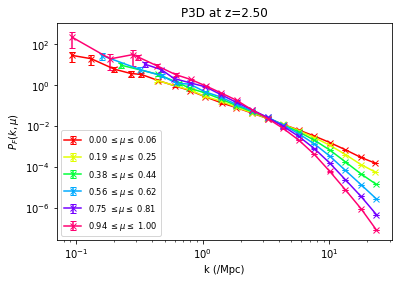

In [25]:
from lace_manager.postprocess import measure_flux_power
p3d_data=p1d_new[0]['p3d_data']
print(p3d_data.keys())
for key in ['k_Mpc', 'mu', 'counts', 'p3d_Mpc']:
    p3d_data[key]=np.array(p3d_data[key])
measure_flux_power.plot_p3d(p3d_data)

In [17]:
a=3